In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import cartopy.crs as ccrs


In [2]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [3]:
def sample_data(shape=(73, 145)):
    """Returns ``lons``, ``lats`` and ``data`` of some fake data."""
    nlats, nlons = shape
    lats1 = np.linspace(-np.pi / 2, np.pi / 2, nlats)
    lons1 = np.linspace(0, 2 * np.pi, nlons)
    lons, lats = np.meshgrid(lons1, lats1)
    wave = 0.75 * (np.sin(2 * lats) ** 8) * np.cos(4 * lons)
    mean = 0.5 * np.cos(2 * lats) * ((np.sin(2 * lats)) ** 2 + 2)

    lats1 = np.rad2deg(lats1)
    lons1 = np.rad2deg(lons1)
    data = wave + mean

    return lons1, lats1, data

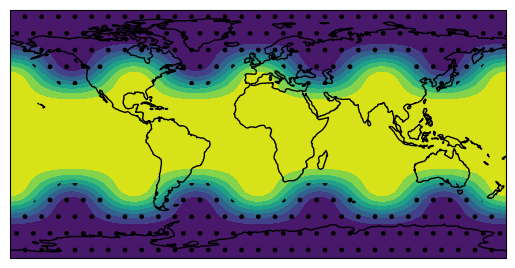

In [4]:
#x = np.linspace(0, 5, 51)
#y = np.linspace(0, 5, 41)

x, y, Z = sample_data()

#X, Y = np.meshgrid(x, y)
#Z = f(X, Y)

da = xr.DataArray(Z, coords = {"lon":x, "lat":y}, dims=["lat", "lon"])

ax = plt.axes(projection=ccrs.PlateCarree())

ax.contourf(da.lon, da.lat, da)
ax.coastlines()

mask = da<0.01
ax.contourf(da.lon, da.lat, mask, hatches=["","."], alpha=0)